# Triangular lattice

DVR: dx=[0.75 0.75 1.8 ]w is set.
DVR: n=[4 4 4] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=73.0219kHz w=1000nm
Triangular lattice size adjust to: [4 2]
lattice: lattice shape is triangular
lattice: Full lattice sizes: [4 2]
lattice: lattice constants: [1.45       1.25573684]w
lattice: dx fixed to: [0.75 0.75 1.8 ]w
DVR: dx=[0.75 0.75 1.8 ]w is set.
DVR: n=[7 4 4] is set.
DVR: R0=[5.5375     3.62786842 7.2       ]w is set.
H_mat: n=[7 4 4] dx=[0.75 0.75 1.8 ]w p=[0 0 1] Gaussian diagonalization starts.
H_mat: H matrix memory usage: 3.48 MiB.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.57s.
H_solver: eigenstates memory usage:  0.04 MiB.
Optimizing...
Terminated - min grad norm reached after 64 iterations, 0.03 seconds.

Trap site position of Wannier functions: [7 4 4 1 5 0 0 2]
Order of Wannier functions is set to match traps.
Single band optimization time: 0.06299805641174316s.
Calculate U.
Single band interac

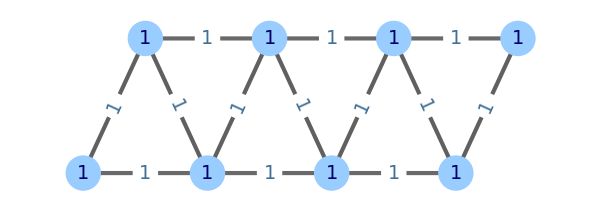

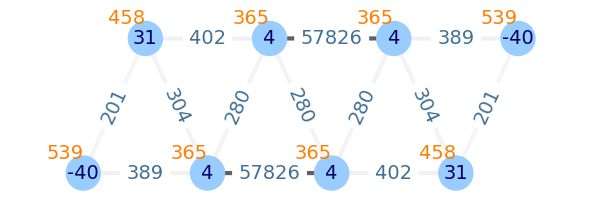

In [1]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 4
Lx = 4
Ly = 2
d = 3
shape = 'triangular'
w = None
eqt = 'neq'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([Lx, Ly], dtype=int),
                 trap=(73.0219, 1000),
                 lc=1450,
                 laser=780,
                 dim=d,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 symmetry=True,
                 lattice_symmetry=False,
                 verbosity=2)
eig_sol = eigen_basis(G)
G.singleband_Hubbard(u=True, eig_sol=eig_sol)
G.draw_graph('adjust', A=G.A, U=G.U)
G.draw_graph(A=G.A, U=G.U)

print(f'V = {np.diag(G.A)}')
cv = np.sqrt(G.v_cost_func(G.A, None, None))
ct = np.sqrt(G.t_cost_func(G.A, None, None))
cu = np.sqrt(G.u_cost_func(G.U, None, None))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
